In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.linear_model

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns


import acquire_b
import prepare_b

In [2]:
# Acquire Stage
df = acquire_b.get_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [4]:
train, validate, test = prepare_b.prep_titanic_data(df)

In [5]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [6]:
# double check to make sure we don't have any nulls
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


In [7]:
# Separate out our X and y values
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [8]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [9]:
# The most frequenly observed outcome will be our baseline
train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

In [11]:
baseline_accuracy = (train.survived == 0).mean()
round(baseline_accuracy, 2)

0.62

In [12]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.70


2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [13]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare", "sex_male"]

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.81


3. Try out other combinations of features and models.

In [14]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.82


In [15]:
# All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.81


In [16]:
# Only Age 
features = ["age"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [17]:
# Only pclass
features = ["pclass"]

# All features, but we'll use the class_weights to hold the actual ratios
logit5 = LogisticRegression(random_state=123)

logit5.fit(X_train[features], y_train)

y_pred = logit5.predict(X_train[features])
accuracy = logit5.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.67


In [19]:
# All Features, C ~ 0
# All features, but we'll use the class_weights to hold the actual ratios
logit6 = LogisticRegression(random_state=123, C=0.0001)

logit6.fit(X_train, y_train)

y_pred = logit6.predict(X_train)

accuracy = logit6.score(X_train, y_train)

print("All Features, C hyperparameter approaching 0")
print("Baseline is", round(baseline_accuracy, 2))
print(f'Accuracy of this Logistic Regression on training set: {accuracy:.2}')

All Features, C hyperparameter approaching 0
Baseline is 0.62
Accuracy of this Logistic Regression on training set: 0.64


4. Use you best 3 models to predict and evaluate on your validate sample.

In [20]:
# Let's determine logit1's metrics on validate
features = ["age", "pclass", "fare", "sex_male"]

y_pred = logit1.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

Logit1 model using age, pclass, fare, and is_female as the features
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.67      0.70        82

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214



In [21]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults")
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



In [22]:
# Logit3 uses all features and class_weight='balanced'
y_pred = logit3.predict(X_validate)

print("Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default")
print(classification_report(y_validate, y_pred))

Logit3 model using all features, class_weight='balanced', and all other hyperparameters as default
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       132
           1       0.70      0.71      0.70        82

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [23]:
# using logit3 model for demo here

y_pred_proba = logit3.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['not-survived', 'survived'])
y_pred_proba.head()

,not-survived,survived
0,0.490246,0.509754
1,0.695692,0.304308
2,0.931944,0.068056
3,0.164503,0.835497
4,0.053711,0.946289


In [24]:
# Set new threshold as 0.3 instead of 0.5
t = 0.57

y_pred = (y_pred_proba.survived > t).astype(int)
y_pred.head()

0    0
1    0
2    0
3    1
4    1
Name: survived, dtype: int64

In [25]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       307
           1       0.76      0.74      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



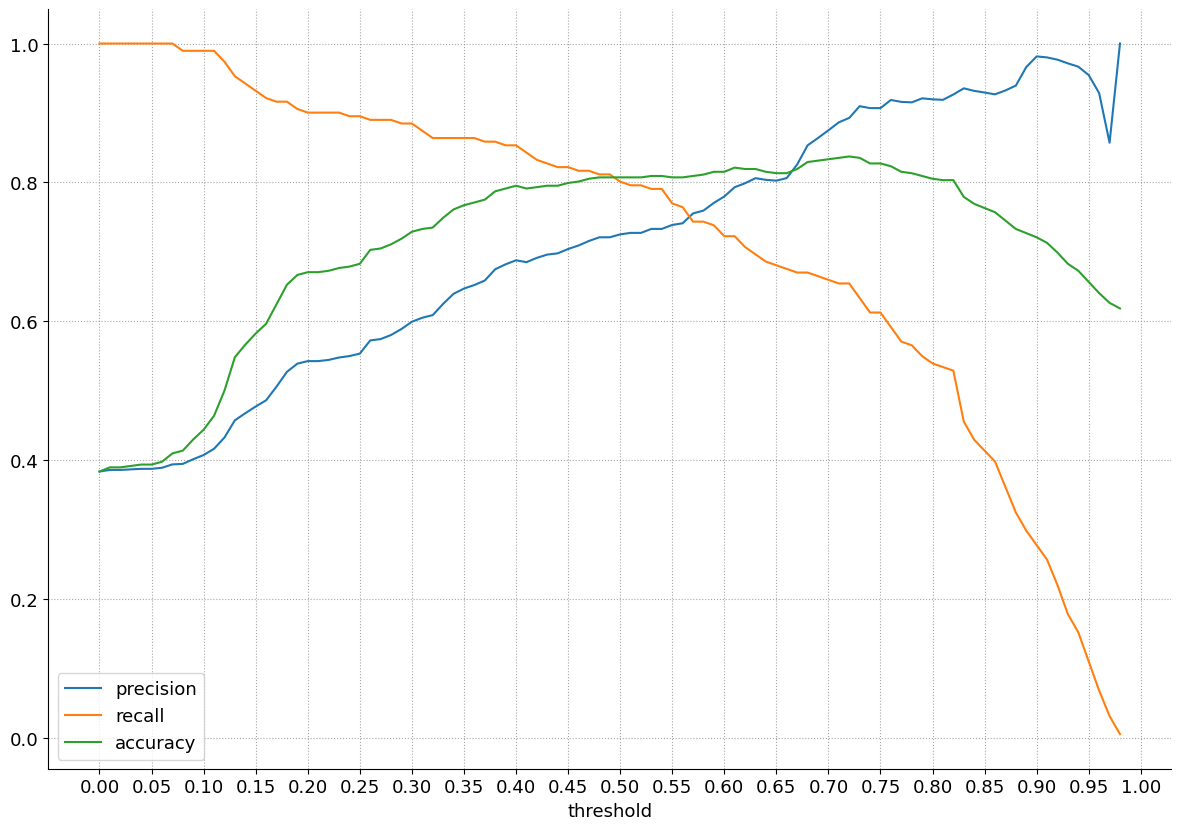

In [26]:
import logistic_regression_util

# plot metrics vs thresholds
logistic_regression_util.plot_metrics_by_thresholds(y_train, y_pred_proba.survived)